STEP 1: DATA LOADING AND INSPECTION
----------

In [1]:
#Importing libraries

#Packages for numeric
import pandas as pd
import numpy as np

#Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, StratifiedKFold 
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, accuracy_score,log_loss# performance metrics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler


#Classifier module
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

#Statsmodels is used to create statistical models
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind





# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data.
telecom = pd.read_csv('tele-churn.csv')

In [3]:
telecom.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
telecom.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
#Shape of the dataframe
print("The number of rows: {}".format(telecom.shape[0]))

print("The number of columns:{}".format(telecom.shape[1]))

The number of rows: 3333
The number of columns:21


In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
telecom.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [8]:
print(telecom['churn'].value_counts())

churn
False    2850
True      483
Name: count, dtype: int64


In [9]:
#Check the discriptive statistics
telecom.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


STEP 2: DATA CLEANING
--------------

In [10]:
#Checking for missing values
telecom.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [11]:
#Checking for duplictes
telecom.duplicated().sum()

0

In [12]:
# Get all columns from the dataset
all_columns = telecom.columns.tolist()  # Extract all column names from the dataset

# Predefined categorical variables and target
categorical_vars = ['state', 'international plan', 'voice mail plan', 'area code']
target = ['churn']
# Dynamically identify numerical variables as the rest
numerical_vars = [col for col in telecom.columns if col.strip().lower() not in [c.lower() for c in categorical_vars + target]]
# Define light blue color for text
light_blue = '\033[94m'
reset_color = '\033[0m'

# Print the results for confirmation with counts and colored titles
print(f"{light_blue}Categorical Variables ({len(categorical_vars)}):{reset_color}", categorical_vars)
print(f"{light_blue}Target Variable ({len(target)}):{reset_color}", target)
print(f"{light_blue}Numerical Variables ({len(numerical_vars)}):{reset_color}", numerical_vars)

Categorical Variables (4): ['state', 'international plan', 'voice mail plan', 'area code']
Target Variable (1): ['churn']
Numerical Variables (16): ['account length', 'phone number', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [13]:
#Checking for duplicates
telecom.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [14]:
telecom.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

STEP 3: EXPLORATORY DATA ANALYSIS
-----------

In [15]:

# change categorical data into numerical dat
#telecom['international plan'] = telecom['international plan'].map({'no': 0, 'yes': 1})
#telecom['voice mail plan'] = telecom['voice mail plan'].map({'no': 0, 'yes': 1})
#df_telecom['churn'] = df_telecom['churn'].map({False : 0, True : 1})

In [16]:
#Calculating the % of International plans
telecom['international plan'].value_counts(normalize=True)

international plan
no     0.90309
yes    0.09691
Name: proportion, dtype: float64

In [17]:
#Calculating the % of International plans
telecom['voice mail plan'].value_counts(normalize=True)

voice mail plan
no     0.723372
yes    0.276628
Name: proportion, dtype: float64

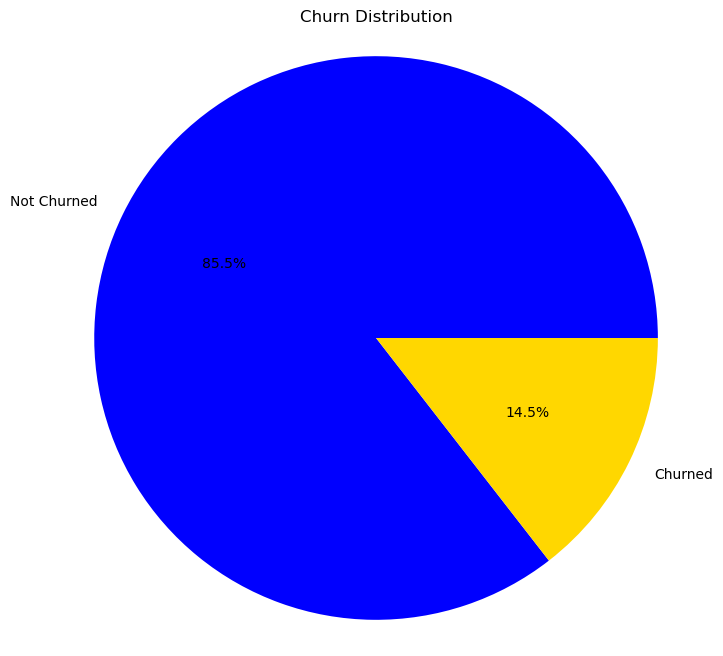

In [18]:
#Visualizing the churn distribution
#Create the pie chart
fig = plt.figure(figsize=(8,8))
colors = ['blue', 'gold']
plt.title('Churn Distribution')
plt.pie(telecom['churn'].value_counts(), labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')
#Show the plot
plt.show()
        

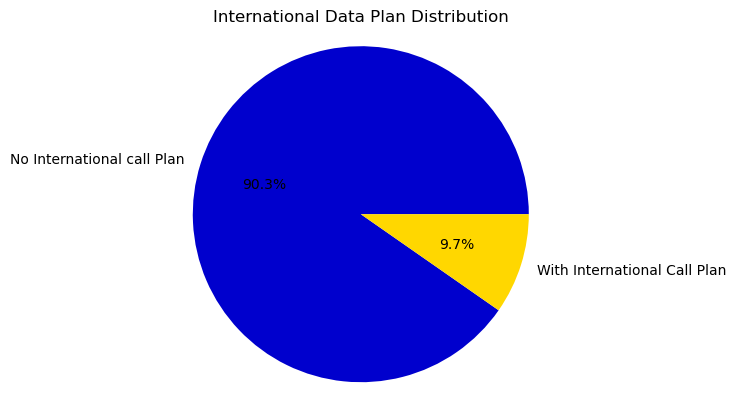

In [19]:
# Visualizing the data plan distribution
# Creating a pie chart
colors = ['mediumblue', 'gold'] 
plt.title('International Data Plan Distribution')
plt.pie(telecom['international plan'].value_counts(),labels=['No International call Plan','With International Call Plan'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Showing the plot
plt.show()

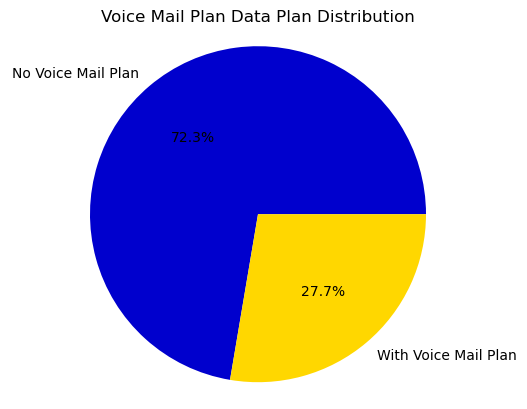

In [20]:
# Visualizing the data plan distribution
# Creating a pie chart
colors = ['mediumblue', 'gold'] 
plt.title('Voice Mail Plan Data Plan Distribution')
plt.pie(telecom['voice mail plan'].value_counts(),labels=['No Voice Mail Plan','With Voice Mail Plan'], autopct='%1.1f%%', colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Showing the plot
plt.show()

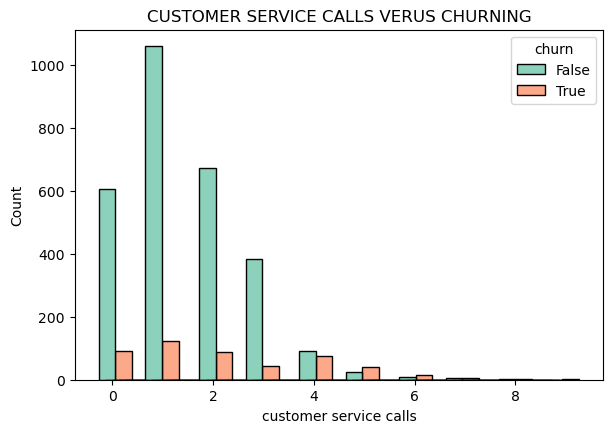

In [21]:
#Histrogram plots  to show distribution of customers service calss and count of churn
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=telecom['customer service calls'],hue=telecom['churn'], multiple='dodge', palette='Set2', shrink=5)
plt.title("CUSTOMER SERVICE CALLS VERUS CHURNING")

plt.show()

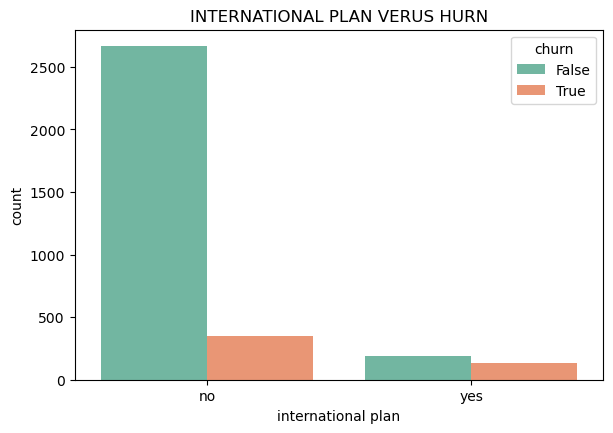

In [22]:
#Histrogram plots to show  distribution of customer with international plan with respect to churn
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=telecom['international plan'],hue= telecom['churn'], palette='Set2')
plt.title("INTERNATIONAL PLAN VERUS HURN")

plt.show()

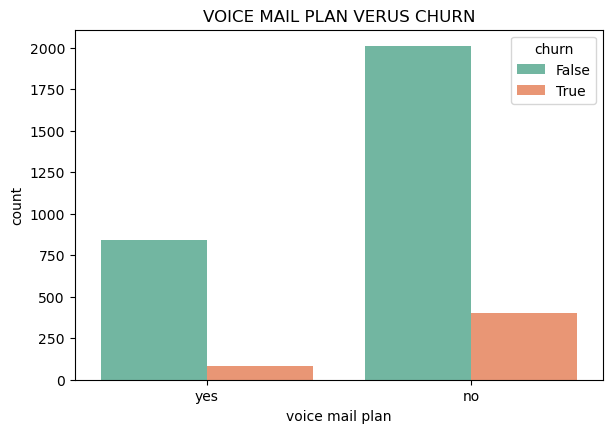

In [23]:
#Histrogram plots to show distribution of customers with Voice Mail Plan with respect to Churn
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=telecom['voice mail plan'],hue= telecom['churn'], palette='Set2')
plt.title("VOICE MAIL PLAN VERUS CHURN")

plt.show()

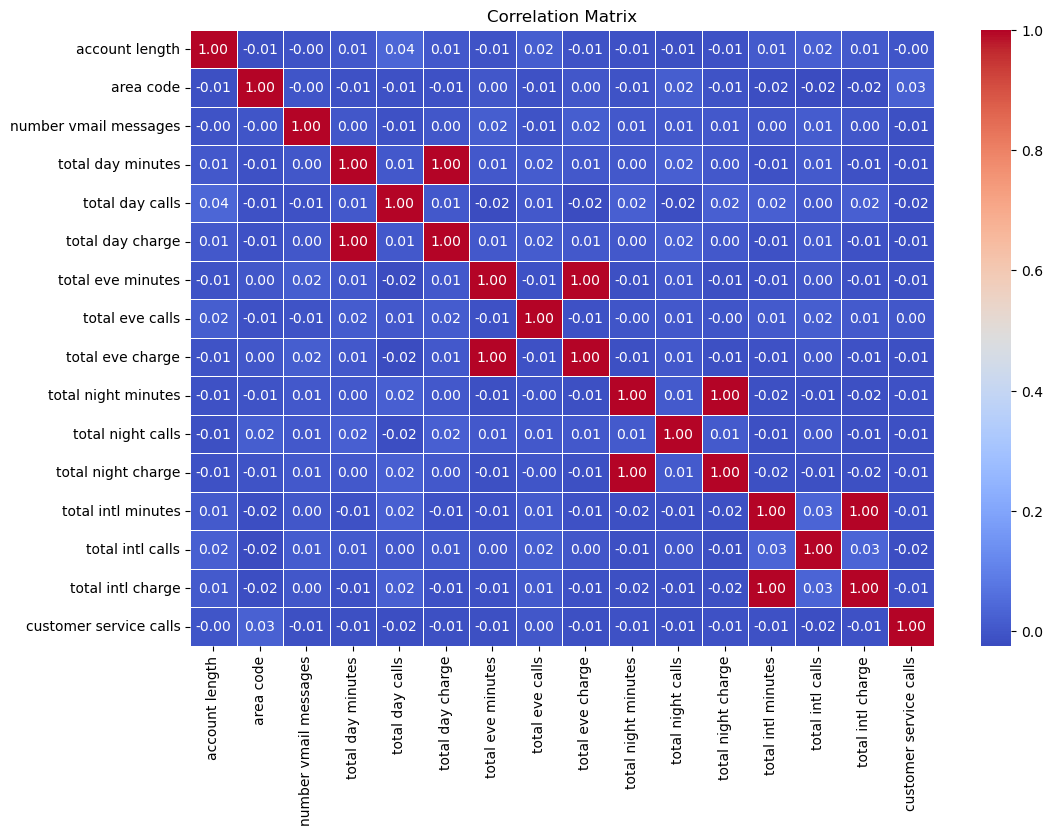

In [24]:
# Visualizing the correlation matrix


# Select only numeric columns for correlation calculation
numeric_data = telecom.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [25]:
correlation_matrix

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


In [26]:
#Calculating the % of International plans
telecom['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

5 Data Preprocessing
-----------
5.1 Encoding
------------

In [27]:
# Removing the phone number and state column
df1 = telecom.drop(['phone number', 'state'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})

FEATURES SCALING / STANDARDIZATION
------------------

In [28]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

df1.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.524793,0.068627,0.0,1.0,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.068627,0.0,1.0,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.068627,0.0,0.0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,0.000000,1.0,0.0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,0.068627,1.0,0.0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0


In [29]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (2666, 18)
Test set size: (667, 18)


Imbalanced class distribution:
 churn
0.0    2284
1.0     382
Name: count, dtype: int64


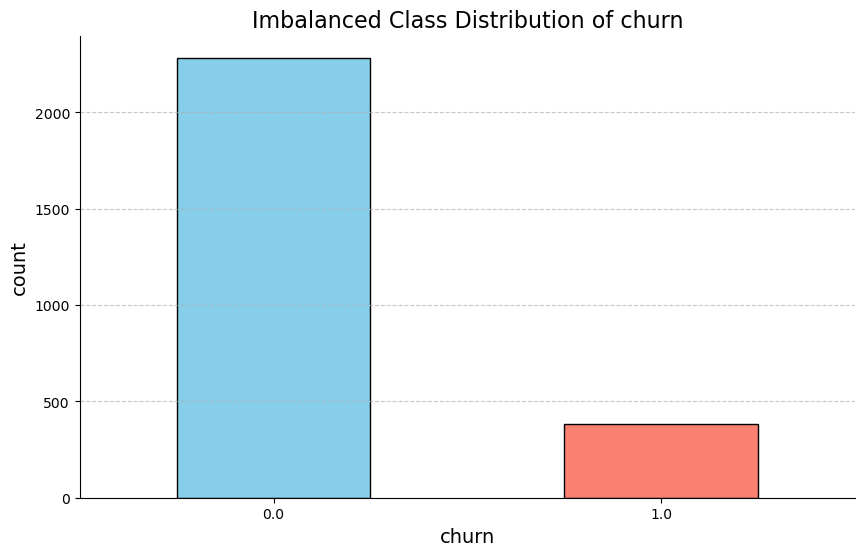

In [30]:
#Verify the Imbalanced class distribution
imbalanced_class_counts = pd.Series(y_train).value_counts()
print("Imbalanced class distribution:\n", imbalanced_class_counts)

#Plotting the resampled class distribution
plt.figure(figsize=(10, 6))
imbalanced_class_counts.plot(kind='bar', color=['skyblue','salmon'], edgecolor='black')
plt.title('Imbalanced Class Distribution of churn', fontsize=16)
plt.xlabel('churn', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

SMOTE
-------

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (4568, 18)

Value counts of y_train_resampled:
 churn
0.0    2284
1.0    2284
Name: count, dtype: int64


Resampled class distribution:
 churn
0.0    2284
1.0    2284
Name: count, dtype: int64


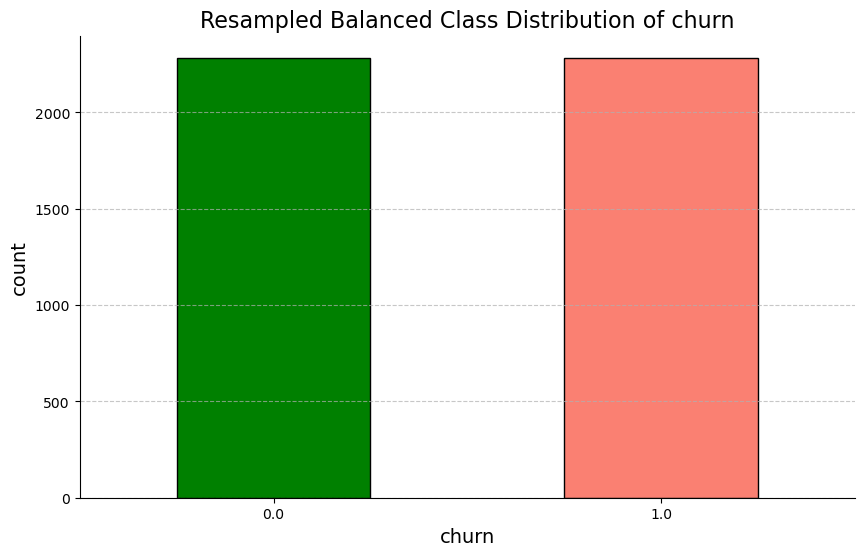

In [32]:
#Verify the resampled class distribution
resampled_class_counts = pd.Series(y_train_resampled).value_counts()
print("Resampled class distribution:\n", resampled_class_counts)

#Plotting the resampled class distribution
plt.figure(figsize=(10, 6))
resampled_class_counts.plot(kind='bar', color=['green','salmon'], edgecolor='black')
plt.title('Resampled Balanced Class Distribution of churn', fontsize=16)
plt.xlabel('churn', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

6 DATA MODELING
--------

6.1 LOGISTIC REGRESSION
---------

In [33]:
#Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

#Train the model
log_reg.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_log_reg = log_reg.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_log_reg))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))





Logistic Regression Accuracy: 79.01%
              precision    recall  f1-score   support

         0.0       0.95      0.79      0.87       566
         1.0       0.40      0.77      0.53       101

    accuracy                           0.79       667
   macro avg       0.68      0.78      0.70       667
weighted avg       0.87      0.79      0.81       667

Confusion Matrix:
 [[449 117]
 [ 23  78]]
ROC AUC Score: 0.8360214113284119


6.1.1 CONFUSION MATRIX FOR LOGISTIC REGRESSION
------------

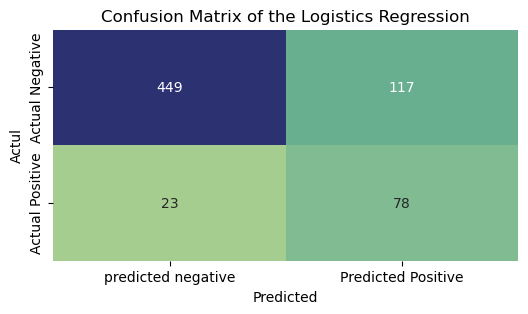

In [34]:
#Build confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

#Visualize the Matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True, cmap='crest', fmt='g', cbar=False,
            xticklabels=['predicted negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actul')
plt.title('Confusion Matrix of the Logistics Regression')
plt.show()

6.2 DECISION TREE CLASSIFIER
---------------

In [35]:
#Initialize the Decision Tree Classifier model
decision_tree = DecisionTreeClassifier(random_state=42)

#Train the model
decision_tree.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_decision_tree = decision_tree.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Classifier Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_decision_tree))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))
print("ROC AUC Score:", roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]))

Decision Tree Classifier Accuracy: 88.76%
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       566
         1.0       0.61      0.73      0.66       101

    accuracy                           0.89       667
   macro avg       0.78      0.82      0.80       667
weighted avg       0.90      0.89      0.89       667

Confusion Matrix:
 [[518  48]
 [ 27  74]]
ROC AUC Score: 0.8239338068082427


6.2.1 CONFUSION MATRIX FOR DECISION TREE CLASSIFIER
-----------

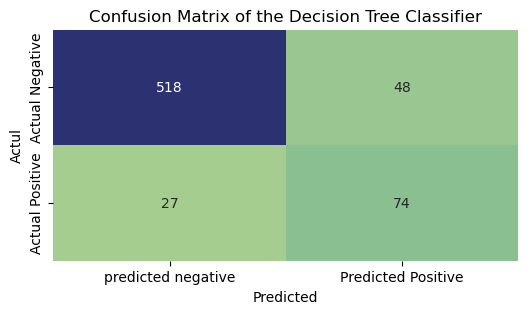

In [36]:
#Build confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)

#Visualize the Matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True, cmap='crest', fmt='g', cbar=False,
            xticklabels=['predicted negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actul')
plt.title('Confusion Matrix of the Decision Tree Classifier')
plt.show()

6.3 RANDOM FOREST
------------

In [37]:
#Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

#Train the model
random_forest.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_random_forest = random_forest.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_random_forest)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_random_forest))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))
print("ROC AUC Score:", roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]))

Random Forest Accuracy: 94.60%
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       566
         1.0       0.85      0.78      0.81       101

    accuracy                           0.95       667
   macro avg       0.91      0.88      0.89       667
weighted avg       0.94      0.95      0.95       667

Confusion Matrix:
 [[552  14]
 [ 22  79]]
ROC AUC Score: 0.9252177867963476


6.3.1 CONFUSION MATRIX FOR RANDOM FOREST
--------------------

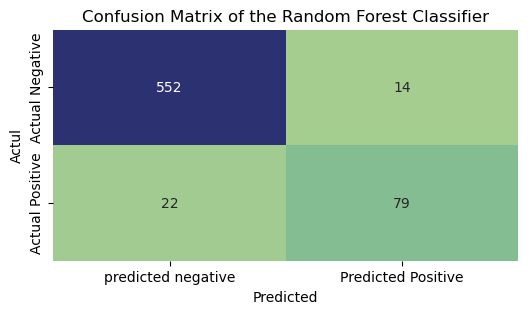

In [38]:
#Build confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_random_forest)

#Visualize the Matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True, cmap='crest', fmt='g', cbar=False,
            xticklabels=['predicted negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actul')
plt.title('Confusion Matrix of the Random Forest Classifier')
plt.show()

6.4 GRADIENT BOOSTING CLASSIFIER
-----------------

In [39]:
#Initialize the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

#Train the model
gbc.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_gbc = gbc.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_gbc)
print(f"Gradient Boosting Classifier Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_gbc))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))
print("ROC AUC Score:", roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1]))

Gradient Boosting Classifier Accuracy: 94.15%
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       566
         1.0       0.82      0.79      0.80       101

    accuracy                           0.94       667
   macro avg       0.89      0.88      0.88       667
weighted avg       0.94      0.94      0.94       667

Confusion Matrix:
 [[548  18]
 [ 21  80]]
ROC AUC Score: 0.9177308190182976


6.4.1 CONFUSION MATRIX FOR GRADIENT BOOSTING CLASSIFIER
---------------

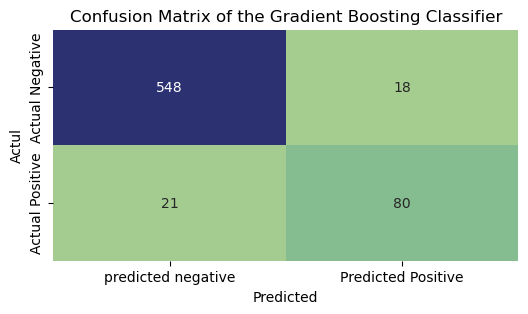

In [40]:
#Build confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbc)

#Visualize the Matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True, cmap='crest', fmt='g', cbar=False,
            xticklabels=['predicted negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actul')
plt.title('Confusion Matrix of the Gradient Boosting Classifier')
plt.show()

6.5 KNEIGHBORSCLASSIFIER
------------

In [41]:
#Initialize the Gradient Boosting model
knn =  KNeighborsClassifier ()

#Train the model
knn.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_knn = knn.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_knn)
print(f"KNeighbors Classifier Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_knn))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

KNeighbors Classifier Accuracy: 80.06%
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87       566
         1.0       0.42      0.78      0.54       101

    accuracy                           0.80       667
   macro avg       0.68      0.79      0.71       667
weighted avg       0.87      0.80      0.82       667

Confusion Matrix:
 [[455 111]
 [ 22  79]]
ROC AUC Score: 0.8467270755344085


6.5.1 CONFUSION MATRIX FOR KNEIGHBORS CLASSIFIER
-----------

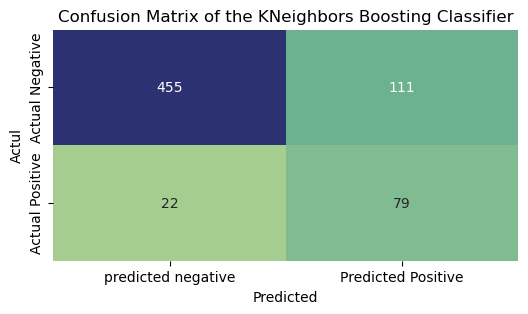

In [42]:
#Build confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

#Visualize the Matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True, cmap='crest', fmt='g', cbar=False,
            xticklabels=['predicted negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actul')
plt.title('Confusion Matrix of the KNeighbors Boosting Classifier')
plt.show()

6.6 GAUSSIAN NAIVE BAYES
------------

In [43]:
#Initialize the Gradient Boosting model
nb =  GaussianNB()

#Train the model
nb.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_nb = nb.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_nb)
print(f"Gaussian naive Bayes Classifier Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_nb))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("ROC AUC Score:", roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1]))

Gaussian naive Bayes Classifier Accuracy: 80.06%
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87       566
         1.0       0.41      0.76      0.54       101

    accuracy                           0.80       667
   macro avg       0.68      0.78      0.70       667
weighted avg       0.87      0.80      0.82       667

Confusion Matrix:
 [[457 109]
 [ 24  77]]
ROC AUC Score: 0.8136829584018472


6.6.1 CONFUSION MATRIX FOR GAUSSIAN NAIVE BAYES CLASSIFIER
-----------

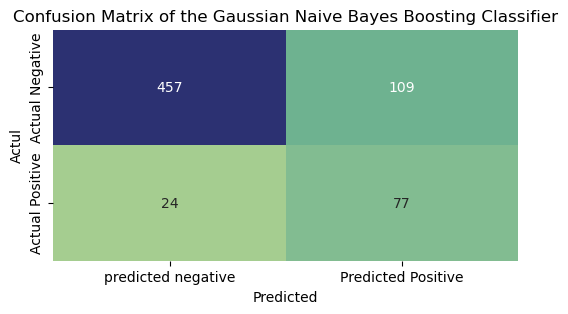

In [44]:
#Build confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

#Visualize the Matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True, cmap='crest', fmt='g', cbar=False,
            xticklabels=['predicted negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actul')
plt.title('Confusion Matrix of the Gaussian Naive Bayes Boosting Classifier')
plt.show()

6.7 MLP CLASSIFIER (NEURAL NETWORK)
------------

In [45]:
#Initialize the Gradient Boosting model
mlp =  MLPClassifier()

#Train the model
mlp.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_mlp = mlp.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_mlp)
print(f"MLP Classifier Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_mlp))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("ROC AUC Score:", roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]))

MLP Classifier Accuracy: 89.51%
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       566
         1.0       0.63      0.74      0.68       101

    accuracy                           0.90       667
   macro avg       0.79      0.83      0.81       667
weighted avg       0.90      0.90      0.90       667

Confusion Matrix:
 [[522  44]
 [ 26  75]]
ROC AUC Score: 0.8962670118601966


6.7.1 CONFUSION MATRIX FOR MLP CLASSIFIER
-------------

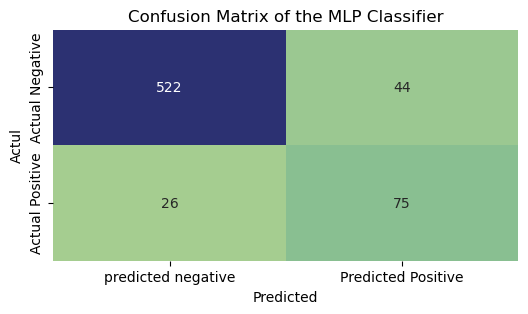

In [46]:
#Build confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

#Visualize the Matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True, cmap='crest', fmt='g', cbar=False,
            xticklabels=['predicted negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actul')
plt.title('Confusion Matrix of the MLP Classifier')
plt.show()

6.8 ADABOOST CLASSIFIER
----------

In [47]:
#Initialize the Ada Boosting model
ada =  AdaBoostClassifier()

#Train the model
ada.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_ada = ada.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_ada)
print(f"Ada Boost Classifier Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_ada))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("ROC AUC Score:", roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1]))

Ada Boost Classifier Accuracy: 86.06%
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       566
         1.0       0.54      0.56      0.55       101

    accuracy                           0.86       667
   macro avg       0.73      0.74      0.73       667
weighted avg       0.86      0.86      0.86       667

Confusion Matrix:
 [[517  49]
 [ 44  57]]
ROC AUC Score: 0.8527796242521779


6.8.1 CONFUSION MATRIX FOR ADABOOST CLASSIFIER
----------

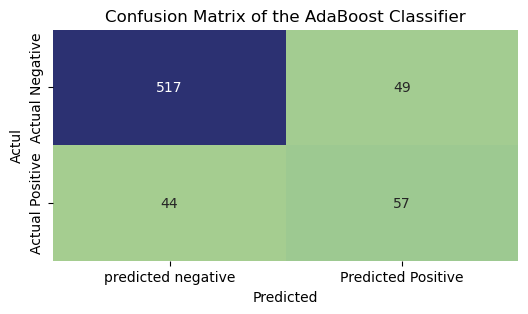

In [48]:
#Build confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_ada)

#Visualize the Matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True, cmap='crest', fmt='g', cbar=False,
            xticklabels=['predicted negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actul')
plt.title('Confusion Matrix of the AdaBoost Classifier')
plt.show()

7 K_FOLD CROSS VALIDATION
------------

In [49]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

7.1 Logistic Regression model performance with 10 Fold Cross Validation
-----------

In [50]:
k_fold = StratifiedKFold(n_splits=10 , shuffle=True, random_state=0)

log_reg = LogisticRegression()
score = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=k_fold, scoring='accuracy')
print(score)
mean_score_log_reg = score.mean()
std_dev_log_reg = score.std()
print(f"The std score of cross validation using Logistic Regression algorithm is {std_dev_log_reg * 100:.2f}%")
print(f"The mean score of cross validation using Logistic Regression (LR) algorithm is {mean_score_log_reg * 100:.2f}%")

[0.75929978 0.80962801 0.73960613 0.74835886 0.73960613 0.77461707
 0.75054705 0.7833698  0.77850877 0.75219298]
The std score of cross validation using Logistic Regression algorithm is 2.13%
The mean score of cross validation using Logistic Regression (LR) algorithm is 76.36%


7.2 Decision Tree Classifier model performance with 10 Fold Cross Validation
-----------

In [51]:
k_fold = StratifiedKFold(n_splits=10 , shuffle=True, random_state=0)

decision_tree = DecisionTreeClassifier()
score = cross_val_score(decision_tree, X_train_resampled, y_train_resampled, cv=k_fold, scoring='accuracy')
print(score)
mean_score_decision_tree = score.mean()
std_dev_decision_tree = score.std()
print(f"The std score of cross validation using Decision Tree algorithm is {std_dev_decision_tree * 100:.2f}%")
print(f"The mean score of cross validation using Decision Tree algorithm is {mean_score_decision_tree * 100:.2f}%")

[0.92560175 0.91466083 0.9190372  0.89715536 0.90153173 0.91466083
 0.9190372  0.92997812 0.91008772 0.9122807 ]
The std score of cross validation using Decision Tree algorithm is 0.95%
The mean score of cross validation using Decision Tree algorithm is 91.44%


7.3 Random Forest Classifier model performance with 10 Fold Cross Validation
-----------

In [52]:
k_fold = StratifiedKFold(n_splits=10 , shuffle=True, random_state=0)

random_forest = RandomForestClassifier()
score = cross_val_score(random_forest, X_train_resampled, y_train_resampled, cv=k_fold, scoring='accuracy')
print(score)
mean_score_random_forest = score.mean()
std_dev_random_forest = score.std()
print(f"The std score of cross validation using Random Forest algorithm is {std_dev_random_forest * 100:.2f}%")
print(f"The mean score of cross validation using Random Forest algorithm is {mean_score_random_forest * 100:.2f}%")

[0.94748359 0.96498906 0.95404814 0.95842451 0.95404814 0.95623632
 0.97155361 0.96280088 0.9627193  0.9627193 ]
The std score of cross validation using Random Forest algorithm is 0.65%
The mean score of cross validation using Random Forest algorithm is 95.95%


7.4 Gradient Boosting Classifier model performance with 10 Fold Cross Validation
-----------

In [53]:
k_fold = StratifiedKFold(n_splits=10 , shuffle=True, random_state=0)

gbc = GradientBoostingClassifier()
score = cross_val_score(gbc, X_train_resampled, y_train_resampled, cv=k_fold, scoring='accuracy')
print(score)
mean_score_gbc = score.mean()
std_dev_gbc = score.std()
print(f"The std score of cross validation using Gradient Boosting Classifier is {std_dev_gbc * 100:.2f}%")
print(f"The mean score of cross validation using Gradient Boosting Classifier algorithm is {mean_score_gbc * 100:.2f}%")

[0.94310722 0.96280088 0.94310722 0.94967177 0.94310722 0.9452954
 0.94748359 0.95404814 0.9627193  0.93859649]
The std score of cross validation using Gradient Boosting Classifier is 0.80%
The mean score of cross validation using Gradient Boosting Classifier algorithm is 94.90%


7.5 KNeigbhors Classifier model performance with 10 Fold Cross Validation
-----------

In [54]:
k_fold = StratifiedKFold(n_splits=10 , shuffle=True, random_state=0)

knn = KNeighborsClassifier()
score = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=k_fold, scoring='accuracy')
print(score)
mean_score_knn = score.mean()
std_dev_knn = score.std()
print(f"The std score of cross validation using Kneighbors Classifier algorithms is {std_dev_knn * 100:.2f}%")
print(f"The mean score of cross validation using KNeighbors Classifier algorithm is {mean_score_knn * 100:.2f}%")

[0.86652079 0.89934354 0.88621444 0.91684902 0.91247265 0.91247265
 0.88402626 0.90809628 0.90789474 0.89912281]
The std score of cross validation using Kneighbors Classifier algorithms is 1.51%
The mean score of cross validation using KNeighbors Classifier algorithm is 89.93%


7.6 Gaussian NaiveBayes model performance with 10 Fold Cross Validation
-----------

In [55]:
k_fold = StratifiedKFold(n_splits=10 , shuffle=True, random_state=0)

nb = GaussianNB()
score = cross_val_score(nb, X_train_resampled, y_train_resampled, cv=k_fold, scoring='accuracy')
print(score)
mean_score_nb = score.mean()
std_dev_nb = score.std()
print(f"The std score of cross valodation using Guassian NaiveBayes algorithm is {std_dev_nb * 100:.2f}%")
print(f"The mean score of cross validation using Gaussian NaiveBayes algorithm is {mean_score_nb * 100:.2f}%")

[0.75492341 0.81838074 0.75492341 0.78993435 0.80525164 0.82932166
 0.76586433 0.82932166 0.8245614  0.8004386 ]
The std score of cross valodation using Guassian NaiveBayes algorithm is 2.82%
The mean score of cross validation using Gaussian NaiveBayes algorithm is 79.73%


7.7 MLP Classifier model performance with 10 Fold Cross Validation
-----------

In [56]:
k_fold = StratifiedKFold(n_splits=10 , shuffle=True, random_state=0)

mlp = MLPClassifier()

score = cross_val_score(mlp, X_train_resampled, y_train_resampled, cv=k_fold, scoring='accuracy')
print(score)
mean_score_mlp = score.mean()
std_dev_mlp = score.std()
print (f"The std score of cross validation using MLP Classifier algorithm is {std_dev_mlp * 100:.2f}%")
print(f"The mean score of cross validation using MLP Classifier algorithm is {mean_score_mlp * 100:.2f}%")

[0.85339168 0.89059081 0.84682713 0.87308534 0.88183807 0.87746171
 0.88183807 0.88402626 0.86184211 0.85526316]
The std score of cross validation using MLP Classifier algorithm is 1.43%
The mean score of cross validation using MLP Classifier algorithm is 87.06%


7.8 AdaBoost Classifier model performance with 10 Fold Cross Validation
-----------

In [57]:
k_fold = StratifiedKFold(n_splits=10 , shuffle=True, random_state=0)

ada = AdaBoostClassifier()

score = cross_val_score(ada, X_train_resampled, y_train_resampled, cv=k_fold, scoring='accuracy')
print(score)
mean_score_ada = score.mean()
std_dev_ada = score.std()
print (f"The std score of cross validation using AdaBoost Classifier algorithm is {std_dev_ada * 100:.2f}%")
print(f"The mean score of cross validation using AdaBoost Classifier algorithm is {mean_score_ada * 100:.2f}%")

[0.86214442 0.89496718 0.85339168 0.86870897 0.88621444 0.90809628
 0.87746171 0.89496718 0.90350877 0.88815789]
The std score of cross validation using AdaBoost Classifier algorithm is 1.71%
The mean score of cross validation using AdaBoost Classifier algorithm is 88.38%


In [67]:
# Add the mean score to an array.
Mean = [{mean_score_log_reg*100},{mean_score_decision_tree*100},{mean_score_random_forest*100},{mean_score_gbc*100}, {mean_score_knn*100}, {mean_score_mlp*100},
                   {mean_score_nb*100}, {mean_score_ada * 100}]
# Add the model name to an array.
model = ["LR","DT","RF","GBC", "KNN", "MLP", "NB", "ADA"]

# Convert result_modeling and model into a DataFrame using Pandas.
Mean = pd.DataFrame(Mean,columns=["K_FOLD"])
model = pd.DataFrame(model,columns=["Model"])

In [68]:
# Merge the model table with the result_modeling table.
modelling = pd.concat([model, Mean],axis=1)
modelling

,Model,K_FOLD
0,LR,76.357346
1,DT,91.440314
2,RF,95.950228
3,GBC,94.899372
4,KNN,89.930132
5,MLP,87.061643
6,NB,79.729212
7,ADA,88.376185


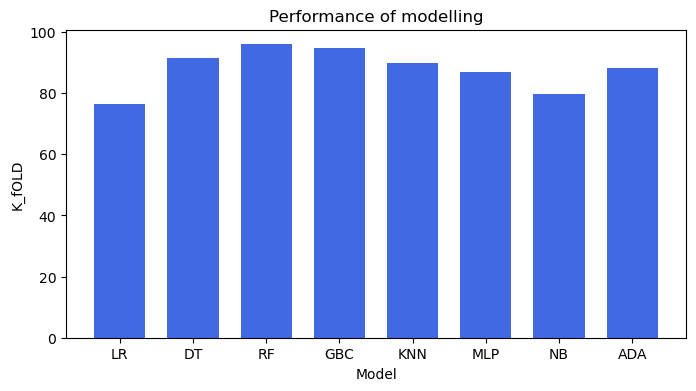

In [73]:
# Visualize model performance in a bar chart.
model = modelling.Model
result = modelling.K_FOLD
fig = plt.figure(figsize = (8,  4))
plt.bar(model, result, color = "royalblue", width = 0.7)
plt.xlabel('Model')
plt.ylabel('K_fOLD')
plt.title('Performance of modelling')
plt.show()